In [25]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import re
df = pd.read_csv("data/01_raw/en.openfoodfacts.org.products.tsv", sep="\t")
#df_sample = df.sample(n=10000, random_state=1)



/home/gio/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [26]:
df.shape

(356027, 163)

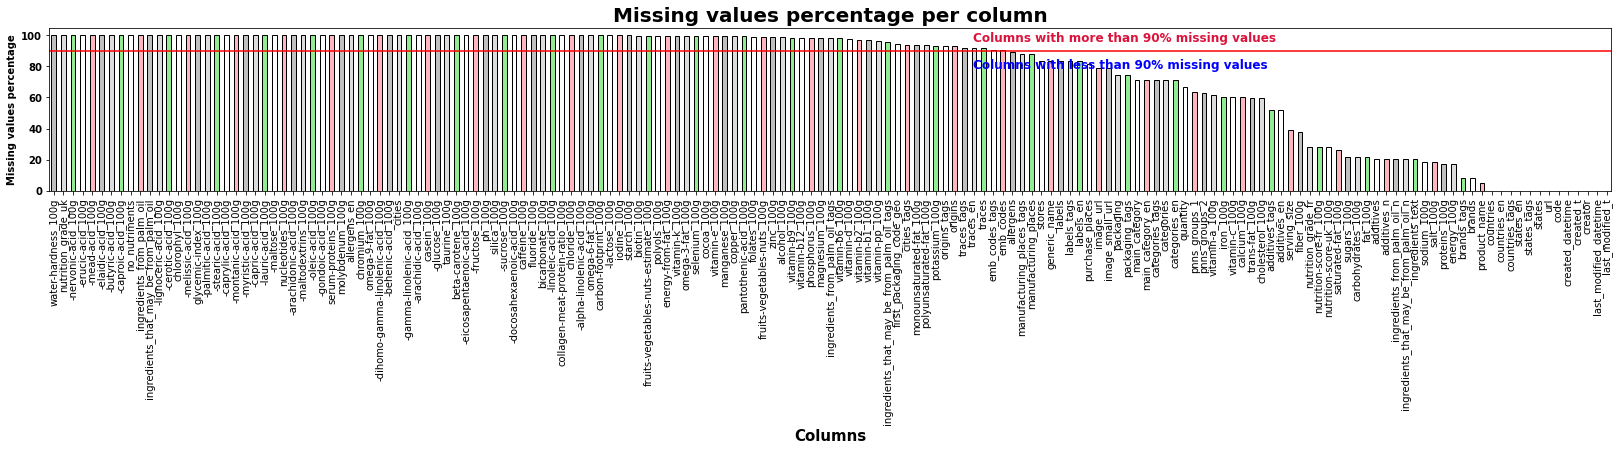

In [27]:
def msv1(data, thresh=20, color='black', edgecolor='black', width=15, height=3):

    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, 'Columns with more than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold', color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, 'Columns with less than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold', color='blue',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage', weight='bold')
    plt.yticks(weight ='bold')
    
    return plt.show()

msv1(df,90, color=('silver', 'gainsboro', 'lightgreen', 'white', 'lightpink'), width=28, height=3)


Retrait des colonnes 90% NA

In [28]:
df_0=df.dropna(thresh=1000, axis=1)

Rajout d'une colonne faisant partie des 90% NA mais qui peut s'averer utile

In [29]:
df_0 = df_0.assign(ingredients_that_may_be_from_palm_oil_tags=df_sample["ingredients_that_may_be_from_palm_oil_tags"].values)

In [30]:
print("Echantillon de base      : {} lignes, {} colonnes.".format(df_sample.shape[0], df_sample.shape[1]))
print("Après retrait des 90% NA : {} lignes, {} colonnes.".format(df_0.shape[0], df_0.shape[1]))

Echantillon de base      : 356027 lignes, 163 colonnes.
Après retrait des 90% NA : 356027 lignes, 96 colonnes.


In [31]:
df_0.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,selenium_100g,fruits-vegetables-nuts_100g,cocoa_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,0.00514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Sélection des entrées concernant uniquement en France

In [33]:
df_0["countries"] = df_0["countries"].apply(
    lambda x: "France" if re.match(r".*(fr).*", str(x), re.IGNORECASE) else x
)

In [34]:
df_1 = df_0[(df_0["countries"] == "France")]

print("Après séléctions lignes France: {} lignes, {} colonnes.".format(df_1.shape[0], df_1.shape[1]))

Après séléctions lignes France: 129323 lignes, 96 colonnes.


In [35]:
list(df_1.columns)

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'states',
 'states_tags',
 'states_en',
 'main_category',
 'main_cat

In [45]:
df_2 = df_1[
    [
        'product_name',
        'brands',
        'categories',
        'ingredients_text',
        'allergens',
        'nutrition_grade_fr',
        'energy_100g',
        'fat_100g',
        'saturated-fat_100g',
        'carbohydrates_100g',
        'sugars_100g',
        'fiber_100g',
        'proteins_100g',
        'salt_100g'
    ]
]

In [37]:
df_2 = df_2[~df_2.product_name.isna()]


In [38]:
list(df_2.columns)

['product_name',
 'brands',
 'categories',
 'ingredients_text',
 'allergens',
 'nutrition_grade_fr',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g']

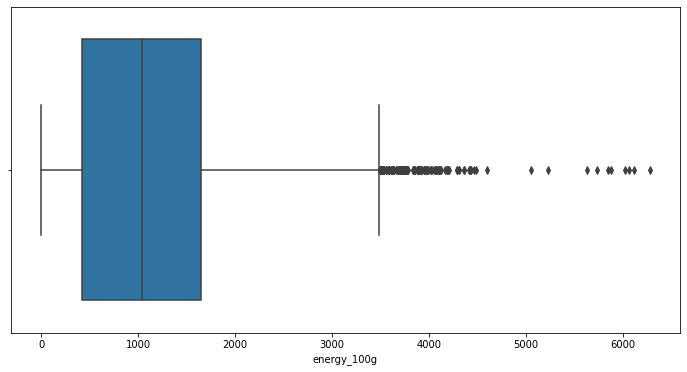

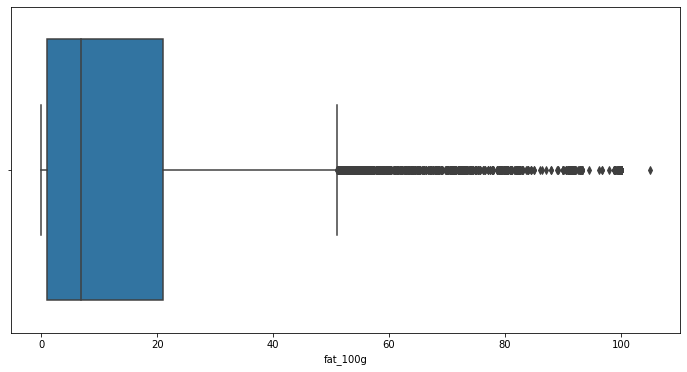

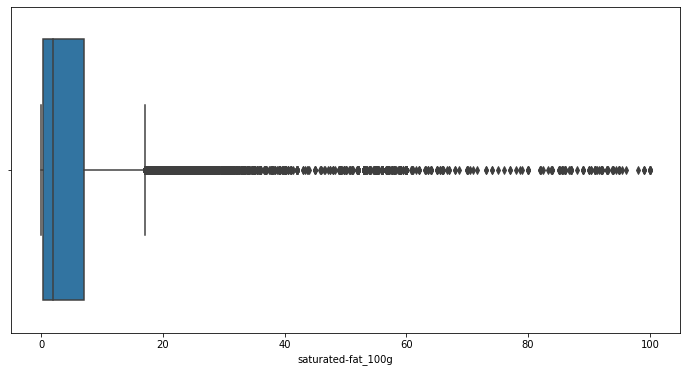

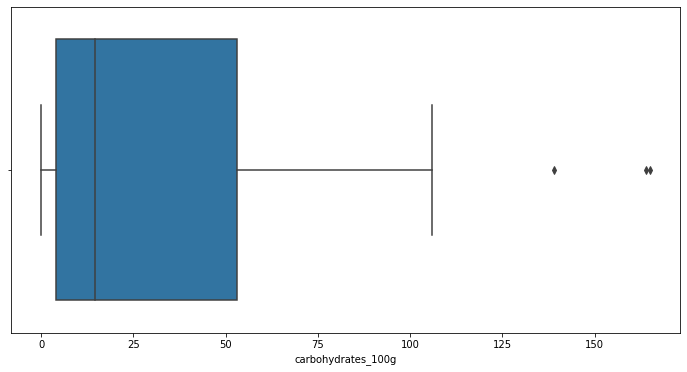

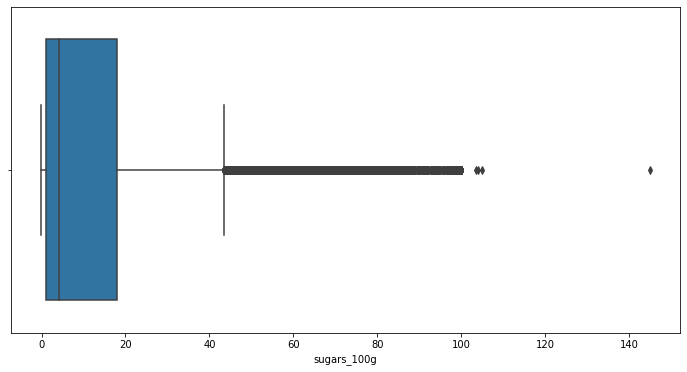

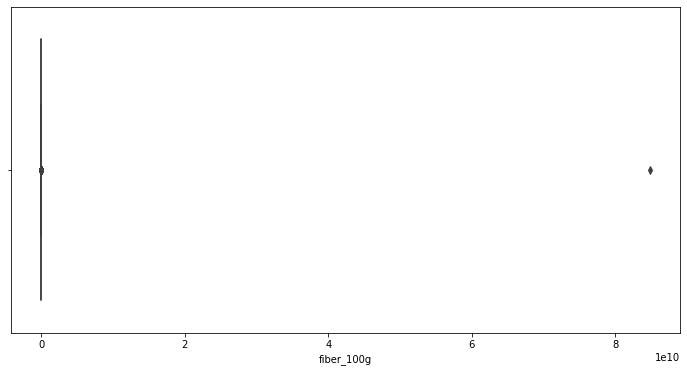

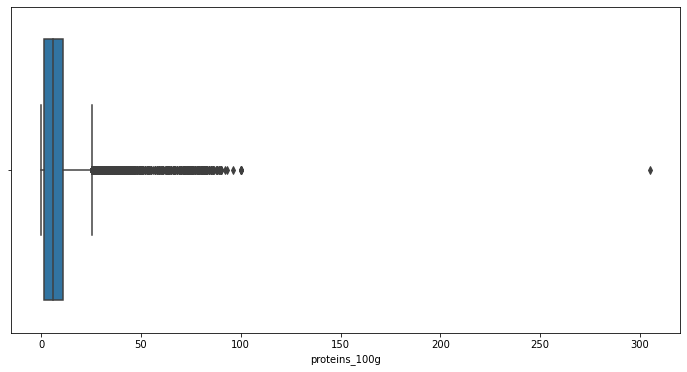

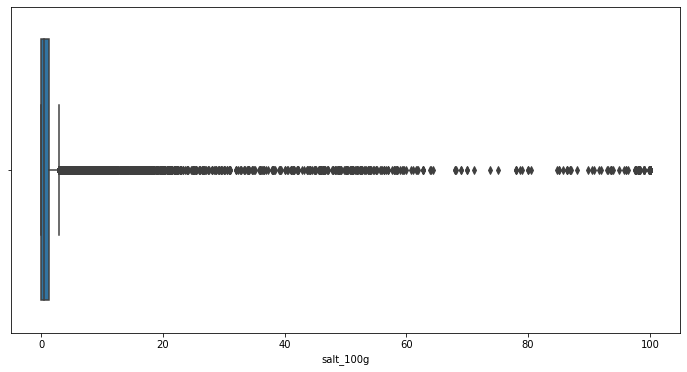

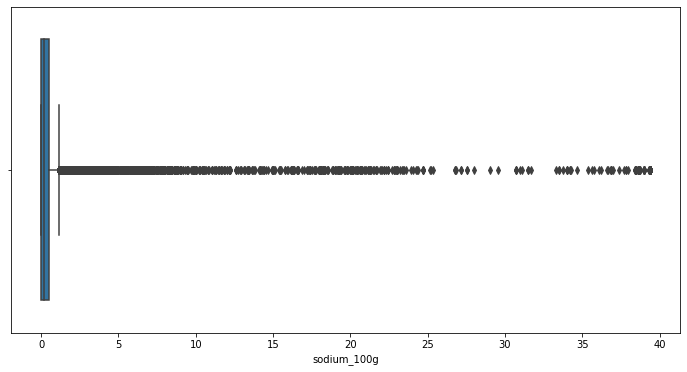

In [39]:
df_x = df_2[[
    'energy_100g',
    'fat_100g',
    'saturated-fat_100g',
    'carbohydrates_100g',
    'sugars_100g',
    'fiber_100g',
    'proteins_100g',
    'salt_100g',
    'sodium_100g'
]]

for i, col in enumerate(df_x.columns):
    plt.figure(i, figsize=(12,6))
    sns.boxplot(x=col, data=df_x)
    

In [40]:
df_2 = df_2[df_2["proteins_100g"] < 100]

In [41]:
df_2.sample(10)

,product_name,brands,categories,ingredients_text,allergens,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
254901,Confiture extra de nectarines,Biolo'Klock,NaN,"Nectarines* 5915%, sucre de canne* 40,5%. *Ing...",NaN,d,862.0,0.2,0.00,55.0,55.0,1.2,0.8,0.06,0.023622
271300,Pain Tranche 1 / 2complet,Belladonne,NaN,PAIN 1/2 COMPLET exo 4 BIO INGREDtENTS farine ...,"BLE, BLE, BLE",b,1356.0,0.7,0.10,47.0,1.2,3.5,7.9,1.34,0.527559
221117,Crêpes Tartiflettes Pommes de Terre - Lardons ...,U,"Plats préparés surgelés,Crêpes et galettes,Pla...",Garniture 50% : Lardons fumés 18%* (poitrine d...,"crème, lait, sulﬁtes, blé, œufs, lait",c,835.0,11.0,3.50,17.0,2.3,0.9,7.5,1.10,0.433071
234230,Mille feuilles de Saumon et St Jacques,Guyader,NaN,"SAUMON (22,5%), eau, Noix de Vdéüòià,surimi (c...","SAUMON, POISSONS, SAUMON, SAUMON, CREMÉ, CRUST...",b,787.0,14.0,2.10,2.6,1.6,2.1,11.9,0.90,0.354331
212852,"Mes p'tites Envies, Rigatoni au chèvre-Épinard...",WeightWatchers,"Frais,Plats préparés,Plats préparés à réchauff...","Rigatoni cuits 48 % (eau, semoule de _blé_ dur...","blé, lait, lait, lait, blé, blé, orge, céleri,...",b,450.0,2.3,1.30,16.0,1.2,1.0,4.6,0.69,0.271654
273425,Pain de mie céréales et graines bio,La Boulangère,"Aliments et boissons à base de végétaux,Alimen...","Farine de _blé_ T65 (49 %), eau, huile de colz...","blé, blé, seigle, gluten, orge",a,1282.0,8.0,0.80,46.3,5.3,5.5,9.1,1.30,0.511811
190026,Foie de veau,Produits Tripiers,NaN,NaN,NaN,a,565.0,NaN,1.60,NaN,0.0,0.0,20.0,0.19,0.074803
257972,Confiture de fraise de Dordogne,Reflets de France,"Aliments et boissons à base de végétaux,Alimen...","Sucre de canne, fraises, gélifiant : pectines,...",NaN,d,1021.0,0.0,0.00,59.0,59.0,1.0,0.0,0.00,0.000000
257305,Riz à poêler Finement Doré,Carrefour,"Aliments et boissons à base de végétaux, Alime...","Riz long grain précuit 97.7%, arômes, huile de...",NaN,a,1581.0,2.5,0.38,78.0,0.0,2.0,8.6,0.00,0.000000
228247,Pain De Mie,Leader Price,NaN,NaN,NaN,c,1226.0,NaN,0.70,NaN,7.5,0.0,7.6,1.20,0.472441


In [42]:
cols =  [
    'energy_100g',
    'fat_100g',
    'saturated-fat_100g',
    'carbohydrates_100g',
    'sugars_100g',
    'fiber_100g',
    'proteins_100g',
    'salt_100g',
    'sodium_100g'
]
for col in cols:
    df_2[col] = df_2[col].fillna(0.0)

cols2 = [
    "categories",
    "ingredients_text",
    "allergens",
    "nutrition_grade_fr",
    "brands"
]
for col in cols2:
    df_2[col] = df_2[col].fillna("Non renseigné")

<AxesSubplot:>

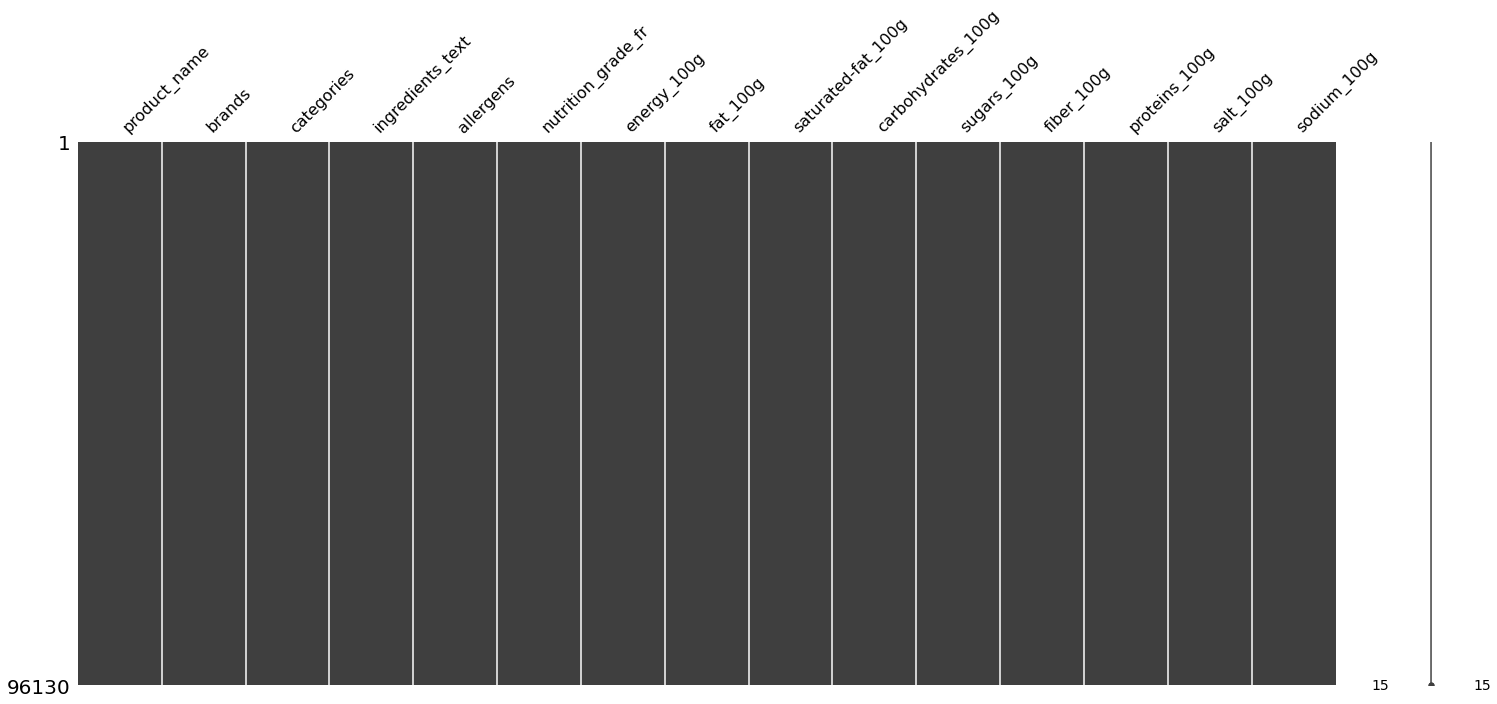

In [43]:
msno.matrix(df_2)

In [44]:
df_2.to_csv("data/02_intermediate/openfoodfacts_df_2.csv")